In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_s_curve
import copy

np.random.seed(42)

In [2]:
%matplotlib inline

In [3]:
plt.rcParams.update({'font.size': 14, 'figure.figsize': (20,9)})

In [4]:
def get_data(n_samples, x_min=-4.0, x_max=4.0):
    x_1 = np.linspace(x_min, x_max, n_samples).reshape(-1, 1)
    y = np.power(x_1, 2).reshape(-1, 1) + x_1
    return x_1, y

In [5]:
x, y = get_data(50)

In [6]:
def compute_gradients_polynomial_regression(current_theta, samples, targets, n_samples, exps):
    gradients = 2/n_samples * np.dot(np.power(samples, exps).T, (np.dot(np.power(samples, exps), current_theta) - y))
    return gradients

In [7]:
def polynomial_regression(data, target, iteration=100, eta=0.01):
    n_samples = data.shape[0]
    # don't modify original data
    x_data = copy.deepcopy(data)
    # extend data to enable vector operations
    x_data = np.hstack((x_data, x_data[:, -1].reshape(-1, 1)))
    # include bias
    x_b = np.hstack((np.array([1.0] * x_data.shape[0]).reshape(n_samples, -1), x_data.reshape(n_samples, -1)))
    
    dim = x_b.shape[1]
    theta = np.random.random(dim).reshape(-1, 1)
    exps = np.array(list(range(0, dim)))
    
    n_data = x_b.shape[0]
    for i in range(100):
        gradients = compute_gradients_polynomial_regression(theta, x_b, target, n_data, exps)
        theta = theta - eta * gradients
    return theta

In [8]:
def f_polynomial_regression(x_in, theta):
    # include bias
    n_samples = x_in.shape[0]
    x_data = copy.deepcopy(x_in)
    x_data = np.hstack((x_data, x_data[:, -1].reshape(-1, 1)))
    x_b = np.hstack((np.array([1.0] * x_data.shape[0]).reshape(n_samples, -1), x_data.reshape(n_samples, -1)))
    dim = x_b.shape[1]
    exps = np.array(list(range(0, dim)))
    
    # predicted value
    return np.power(x_b, exps).dot(theta)

In [9]:
final_theta = polynomial_regression(x, y, iteration=100, eta=0.01)

In [10]:
f_ = f_polynomial_regression(x, final_theta)

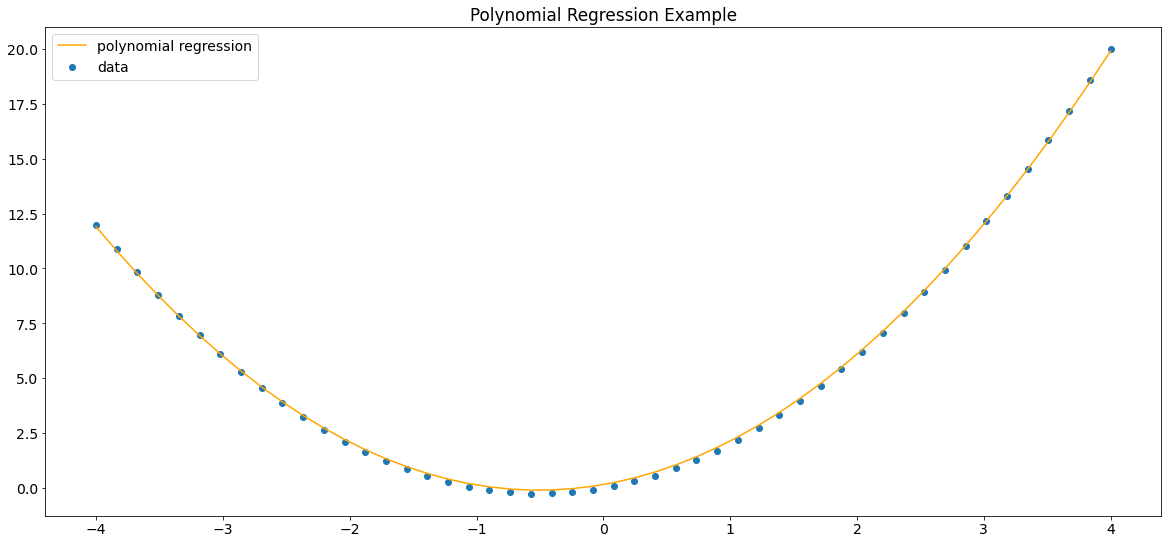

In [11]:
plt.scatter(x, y, label='data')
plt.plot(x, f_, color='orange', label='polynomial regression')
plt.legend()
plt.title('Polynomial Regression Example')
plt.savefig('plots/polynomial_regression_plot.pdf', bbox_inches='tight')
plt.show()